In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#close warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data
data = pd.read_csv("diabetes_data_upload.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
#check data types
data.info()
#only age is numeric, other cols are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
#check missing values
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

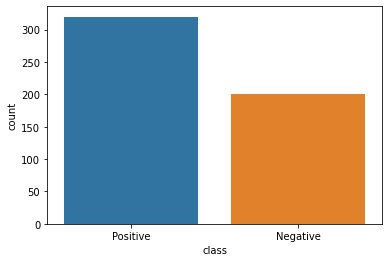

In [5]:
#Class countplot
sn.countplot(data["class"])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

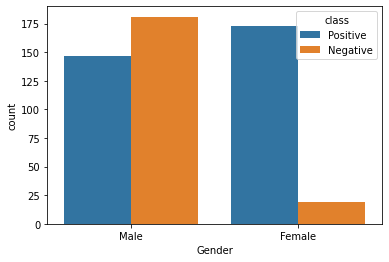

In [6]:
sn.countplot(data['Gender'],hue=data['class'], data=data)

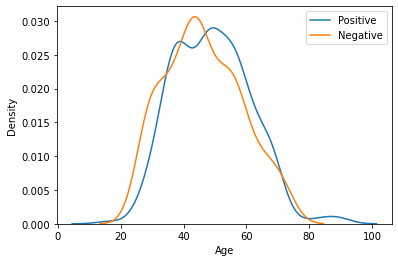

In [7]:
agekde = sn.kdeplot(data['Age'][(data["class"] == "Positive")])
agekde = sn.kdeplot(data['Age'][(data["class"] == "Negative")])

agekde = agekde.legend(["Positive","Negative"])


In [8]:
#Label encoding to categorical cols
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})
data['class'] = data['class'].map({'Positive':1,'Negative':0})
data['Polyuria'] = data['Polyuria'].map({'Yes':1,'No':0})
data['Polydipsia'] = data['Polydipsia'].map({'Yes':1,'No':0})
data['sudden weight loss'] = data['sudden weight loss'].map({'Yes':1,'No':0})
data['weakness'] = data['weakness'].map({'Yes':1,'No':0})
data['Polyphagia'] = data['Polyphagia'].map({'Yes':1,'No':0})
data['Genital thrush'] = data['Genital thrush'].map({'Yes':1,'No':0})
data['visual blurring'] = data['visual blurring'].map({'Yes':1,'No':0})
data['Itching'] = data['Itching'].map({'Yes':1,'No':0})
data['Irritability'] = data['Irritability'].map({'Yes':1,'No':0})
data['delayed healing'] = data['delayed healing'].map({'Yes':1,'No':0})
data['partial paresis'] = data['partial paresis'].map({'Yes':1,'No':0})
data['muscle stiffness'] = data['muscle stiffness'].map({'Yes':1,'No':0})
data['Alopecia'] = data['Alopecia'].map({'Yes':1,'No':0})
data['Obesity'] = data['Obesity'].map({'Yes':1,'No':0})

In [9]:
#min max scaling to age col
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data["Age"] = min_max_scaler.fit_transform(data[["Age"]])

<AxesSubplot:>

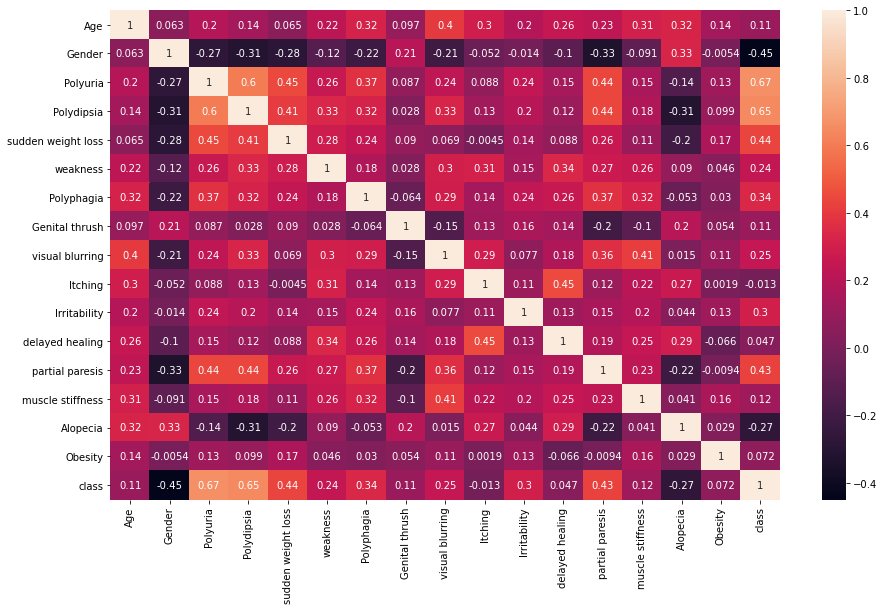

In [10]:
#correlation
corrdata = data.corr()
ax,fig = plt.subplots(figsize=(15,9))
sn.heatmap(corrdata,annot=True)

In [11]:
y = data["class"]
X = data.drop(["class"],axis = 1)

In [12]:
X.corrwith(y).sort_values()

Gender               -0.449233
Alopecia             -0.267512
Itching              -0.013384
delayed healing       0.046980
Obesity               0.072173
Age                   0.108679
Genital thrush        0.110288
muscle stiffness      0.122474
weakness              0.243275
visual blurring       0.251300
Irritability          0.299467
Polyphagia            0.342504
partial paresis       0.432288
sudden weight loss    0.436568
Polydipsia            0.648734
Polyuria              0.665922
dtype: float64

In [13]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


select = SelectKBest(score_func=chi2, k=8)
z = select.fit_transform(X,y)

print("After selecting best 8 features:", z.shape) 





After selecting best 8 features: (520, 8)


In [14]:
filter = select.get_support()
features = np.array(X.columns)
 
print("All features:")
print(features)
 
print("Selected best 8:")
print(features[filter])

print(z) 

All features:
['Age' 'Gender' 'Polyuria' 'Polydipsia' 'sudden weight loss' 'weakness'
 'Polyphagia' 'Genital thrush' 'visual blurring' 'Itching' 'Irritability'
 'delayed healing' 'partial paresis' 'muscle stiffness' 'Alopecia'
 'Obesity']
Selected best 8:
['Gender' 'Polyuria' 'Polydipsia' 'sudden weight loss' 'Polyphagia'
 'Irritability' 'partial paresis' 'Alopecia']
[[1. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 1.]
 [1. 1. 0. ... 0. 0. 1.]
 ...
 [0. 1. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


In [18]:
from collections import Counter
from sklearn.datasets import make_classification
#!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

print(Counter(y))
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
y.describe()

In [ ]:
X_fea = X[features[filter]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fea, y, test_size = 0.2, random_state = 42)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold

lr_model = LogisticRegression()

lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_test)

lrscore = lr_model.score(X_test,y_test)
lrcm = confusion_matrix(y_test,pred)
lrcr = classification_report(y_test,pred)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
crvlsc = cross_val_score(lr_model, X_fea, y, cv=kf)                 

print('Logistic Regression')
print('*******************')
print('Testscore')
print('---------')
print(lrscore)
print('\n')
print('confusion Matrix')
print('----------------')
print(lrcm)
print('\n')
print('Classification Report')
print('---------------------')
print(lrcr)
print('Cross Validation Scores')
print('---------------------')
print(f'Min:{crvlsc.min()}')
print(f'Max:{crvlsc.max()}') 
print(f'Avg:{crvlsc.mean()}\n')


In [17]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10)

rf_model.fit(X_train,y_train)
pred = rf_model.predict(X_test)

rfscore = rf_model.score(X_test,y_test)
rfcm = confusion_matrix(y_test,pred)
rfcr = classification_report(y_test,pred)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
crvlsc = cross_val_score(rf_model, X_fea, y, cv=kf)                 

print('Random Forest')
print('*******************')
print('Testscore')
print('---------')
print(rfscore)
print('\n')
print('confusion Matrix')
print('----------------')
print(rfcm)
print('\n')
print('Classification Report')
print('---------------------')
print(rfcr)
print('Cross Validation Scores')
print('---------------------')
print(f'Min:{crvlsc.min()}')
print(f'Max:{crvlsc.max()}') 
print(f'Avg:{crvlsc.mean()}\n')


NameError: name 'X_train' is not defined

In [ ]:
import pickle
pickle.dump(rf_model, open("model.pkl","wb"))